<div style="height:100px">

<div style="display:inline-block; width:77%; vertical-align:middle;">
    <div>
        <b>Author</b>: <a href="http://pages.di.unipi.it/castellana/">Daniele Castellana</a>
    </div>
    <div>
        PhD student at the Univeristy of Pisa and member of the Computational Intelligence & Machine Learning Group (<a href="http://www.di.unipi.it/groups/ciml/">CIML</a>)
    </div>
    <div>
        <b>Mail</b>: <a href="mailto:daniele.castellana@di.unipi.it">daniele.castellana@di.unipi.it</a>
    </div>
</div>

<div style="display:inline-block; width: 10%; vertical-align:middle;">
    <img align="right" width="100%" src="https://upload.wikimedia.org/wikipedia/it/7/72/Stemma_unipi.png">
</div>

<div style="display:inline-block; width: 10%; vertical-align:middle;">
    <img align="right" width="100%" src="http://www.di.unipi.it/groups/ciml/Home_files/loghi/logo_ciml-restyling2018.svg">
</div>
</div>

# Regularisation and Early Stopping

## Regularisation
Constrain the learning model to avoid overfitting and help improving generalization.

Regularisation add a penalization terms to the loss function that punish the model for excessive use of resources.

## Early Stopping

Running too many epochs may overtrain the network (see previous example) and result in overfitting and perform poorly in generalization.

Early stopping consists to keep a hold out validation set and use it to test accuracy after every epoch. We maintain the weights of the best performing network on the validation set and stop training when error increases beyond this value.

## Data

The dataset for this example originates from the UCI Machine Learning Repository. The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. The data have been normalised before the training.

In [1]:
from keras.datasets import boston_housing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

# rescale values
x_train = StandardScaler().fit(x_train).transform(x_train)
x_test = StandardScaler().fit(x_test).transform(x_test)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2)

print("The training set is matrix of size {}.\n"
      "{} is the number of samples and {} is the number of feature.".format(x_train.shape, x_train.shape[0], x_train.shape[1]))

Using TensorFlow backend.


The training set is matrix of size (323, 13).
323 is the number of samples and 13 is the number of feature.


We build a deep model with four layer.

In [2]:
from keras.models import Sequential
from keras.layers import Dense

def build_model():
    # define the model
    model = Sequential()

    n_feature = x_train.shape[1]
    h_dim=100
    model.add(Dense(h_dim, activation='relu', input_shape=(n_feature,)))
    model.add(Dense(h_dim, activation='relu'))
    model.add(Dense(h_dim, activation='relu'))
    model.add(Dense(h_dim, activation='relu'))
    #lienar activation
    model.add(Dense(1))

    #compile the model
    model.compile(optimizer='adam',
                  loss='mse',
                  metrics=['mae'])
    
    return model

## Callback functions
A callback is a set of functions to be applied at given stages of the training procedure. We can use callbacks to get a view on internal states and statistics of the model during training. We can pass a list of callbacks (as the keyword argument callbacks) to the **.fit()** method of the Sequential or Model classes.

### EarlyStopping callback
This callback stop training when a monitored quantity has stopped improving.

The most relevant arguments are:
- **monitor**:  quantity to be monitored
- **patience**: number of epochs with no improvement after which training will be stopped

Also, we need to add another callback function to store the best parameters found during the training. We use the **ModelCheckpoint** callback.

In [3]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

es = EarlyStopping(monitor='val_loss', verbose=2, patience=10)
mc = ModelCheckpoint('best_model_NOREG.h5', monitor='val_loss', verbose=2, save_best_only=True) #salva il modello su disco quando è "buono", inteso come minima loss sul Validation (vedi "monitor")

model = build_model()
h = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=100, batch_size=10, verbose=2, callbacks=[es,mc]).history

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 323 samples, validate on 81 samples
Epoch 1/100
 - 1s - loss: 337.0514 - mean_absolute_error: 15.3546 - val_loss: 156.0215 - val_mean_absolute_error: 9.5315

Epoch 00001: val_loss improved from inf to 156.02152, saving model to best_model_NOREG.h5
Epoch 2/100
 - 0s - loss: 48.4415 - mean_absolute_error: 4.9663 - val_loss: 27.0723 - val_mean_absolute_error: 3.9695

Epoch 00002: val_loss improved from 156.02152 to 27.07232, saving model to best_model_NOREG.h5
Epoch 3/100
 - 0s - loss: 26.5057 - mean_absolute_error: 3.6247 - val_loss: 22.1606 - val_mean_absolute_error: 3.5827

Epoch 00003: val_loss improved from 27.07232 to 22.16059, saving model to best_model_NOREG.h5
Epoch 4/100
 - 0s - loss: 19.0553 - mean_absolute_error: 3.0180 - val_loss: 12.5404 - val_mean_absolute_error: 2.7810

Epoch 00004: val_loss improved from 22.16059 to 12.54040, saving model to bes


Epoch 00042: val_loss did not improve from 6.65680
Epoch 00042: early stopping


## Regularization

The regularisation can be added to each layer through the argument **kernel_regularizer**.

Any function that takes in a weight matrix and returns a loss contribution tensor can be used as a regularizer, but the most common are already define in keras.regularizers (see [documentation page](https://keras.io/regularizers/)).

In [4]:
from keras.regularizers import l2

def build_L2_model():
    # define the model
    model = Sequential()

    n_feature = x_train.shape[1]
    h_dim=100
    model.add(Dense(h_dim, activation='relu', input_shape=(n_feature,), kernel_regularizer=l2(0.01)))
    model.add(Dense(h_dim, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dense(h_dim, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dense(h_dim, activation='relu', kernel_regularizer=l2(0.01)))
    #lienar activation
    model.add(Dense(1))

    #compile the model
    model.compile(optimizer='adam',
                  loss='mse',
                  metrics=['mae'])
    
    return model

In [5]:
mc = ModelCheckpoint('best_model_L2.h5', monitor='val_loss', verbose=2, save_best_only=True)

L2_model = build_L2_model()
h_L2 = L2_model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=100, batch_size=10, verbose=2, callbacks=[es,mc]).history

Train on 323 samples, validate on 81 samples
Epoch 1/100
 - 2s - loss: 358.2347 - mean_absolute_error: 16.1336 - val_loss: 147.6460 - val_mean_absolute_error: 9.2396

Epoch 00001: val_loss improved from inf to 147.64599, saving model to best_model_L2.h5
Epoch 2/100
 - 0s - loss: 60.4382 - mean_absolute_error: 5.2809 - val_loss: 27.3556 - val_mean_absolute_error: 3.6569

Epoch 00002: val_loss improved from 147.64599 to 27.35564, saving model to best_model_L2.h5
Epoch 3/100
 - 0s - loss: 27.9150 - mean_absolute_error: 3.3443 - val_loss: 19.6697 - val_mean_absolute_error: 3.1456

Epoch 00003: val_loss improved from 27.35564 to 19.66974, saving model to best_model_L2.h5
Epoch 4/100
 - 0s - loss: 22.6248 - mean_absolute_error: 3.0468 - val_loss: 20.5311 - val_mean_absolute_error: 3.2463

Epoch 00004: val_loss did not improve from 19.66974
Epoch 5/100
 - 0s - loss: 21.1956 - mean_absolute_error: 2.9941 - val_loss: 15.1182 - val_mean_absolute_error: 2.7648

Epoch 00005: val_loss improved from

The Dropout regularizer can be applied adding a Dropout layer between two dense layer.

In [6]:
from keras.layers import Dropout

def build_DROPOUT_model():
    # define the model
    model = Sequential()

    n_feature = x_train.shape[1]
    h_dim=100
    model.add(Dense(h_dim, activation='relu', input_shape=(n_feature,)))
    model.add(Dropout(0.2))
    model.add(Dense(h_dim, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(h_dim, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(h_dim, activation='relu'))
    #lienar activation
    model.add(Dense(1))

    #compile the model
    model.compile(optimizer='adam',
                  loss='mse',
                  metrics=['mae'])
    
    return model

In [7]:
mc = ModelCheckpoint('best_model_DROPOUT.h5', monitor='val_loss', verbose=2, save_best_only=True)

DROPOUT_model = build_DROPOUT_model()
h_DROPOUT = DROPOUT_model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=100, batch_size=10, verbose=2, callbacks=[es,mc]).history

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 323 samples, validate on 81 samples
Epoch 1/100
 - 2s - loss: 396.7631 - mean_absolute_error: 17.4770 - val_loss: 141.3688 - val_mean_absolute_error: 9.5707

Epoch 00001: val_loss improved from inf to 141.36883, saving model to best_model_DROPOUT.h5
Epoch 2/100
 - 0s - loss: 83.3330 - mean_absolute_error: 6.4330 - val_loss: 33.5355 - val_mean_absolute_error: 4.2268

Epoch 00002: val_loss improved from 141.36883 to 33.53549, saving model to best_model_DROPOUT.h5
Epoch 3/100
 - 0s - loss: 40.8571 - mean_absolute_error: 4.5012 - val_loss: 26.5573 - val_mean_absolute_error: 3.8826

Epoch 00003: val_loss improved from 33.53549 to 26.55725, saving model to best_model_DROPOUT.h5
Epoch 4/100
 - 0s - loss: 30.8188 - mean_absolute_error: 3.9241 - val_loss: 17.8233 - val_mean_absolute_error: 3.2375

Epoch 00004: val_loss improved from 26.55725 to 17.82331, saving model to be

We load the best model found during the training; we use the function **load_model** from keras.models to load model saved through the ModelCheckpoint callback.

Then, we evaluate the threee models on the test set.

In [8]:
# laod best models and test them
from keras.models import load_model

best_NOREG_model = load_model('best_model_NOREG.h5')
best_L2_model = load_model('best_model_L2.h5')
best_DROPOUT_model = load_model('best_model_DROPOUT.h5')

test_mse_NOREG, test_mae_NOREG = best_NOREG_model.evaluate(x_test, y_test)
test_mse_L2, test_mae_L2 = best_L2_model.evaluate(x_test, y_test)
test_mse_DROPOUT, test_mae_DROPOUT = best_DROPOUT_model.evaluate(x_test, y_test)

102/102 [==============================] - 0s 4ms/step


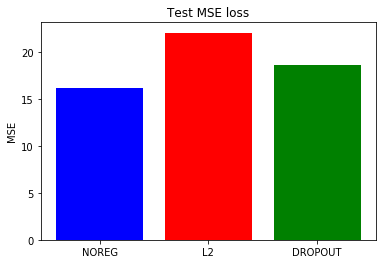

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.bar([1,2,3], [test_mse_NOREG, test_mse_L2, test_mse_DROPOUT], color=['blue','red','green'])
plt.xticks([1,2,3], ['NOREG', 'L2','DROPOUT'])
plt.ylabel('MSE')
plt.title('Test MSE loss');